**Statistical Analysis by Team UXplorers**

This code is for the A/B test in project 3. I have created a dataset inspired by the Kaggle dataset to fit our story better. The added future membership column is to indicate their likelihood of signing up for future membership (1 means future signup, 0 means no signup). 

In [67]:
# import necessary packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import numpy as np
from numpy import random
from scipy import stats
from scipy.stats import chi2_contingency

warnings.simplefilter("ignore")

In [85]:
# read dataset
df = pd.read_csv('C:/Users/zhuda/OneDrive - The Ohio State University/Erdos Institute/ux-research-summer-2025/AB_Test_Results_0628.csv')

In [86]:
df

,USER_ID,VARIANT_NAME,REVENUE,FUTURE_MEMBERSHIP
0,737,control,2.25,0
1,2423,variant,0.00,1
2,9411,variant,5.27,1
3,7311,variant,2.06,1
4,6174,control,1.29,0
...,...,...,...,...
9995,1981,variant,0.60,1
9996,502,control,1.61,1
9997,9214,control,0.73,1
9998,7741,variant,2.64,0


In [87]:
# separate into two groups
control = df[df['VARIANT_NAME'] == 'control']
variant = df[df['VARIANT_NAME'] == 'variant']

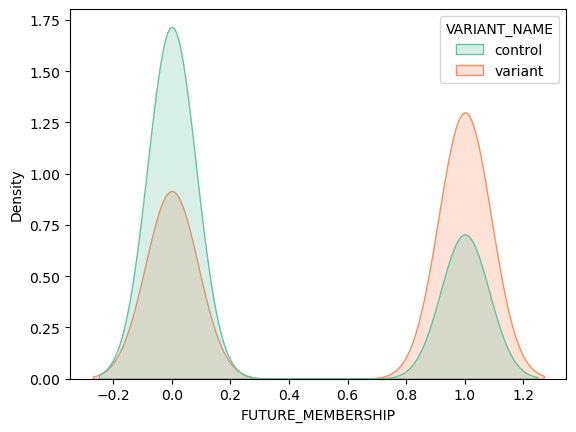

In [88]:
# create a density plot of the data
fig = sns.kdeplot(data=df, x='FUTURE_MEMBERSHIP', hue='VARIANT_NAME', shade=True, palette="Set2")
#fig.set_xlim(500,525)
plt.show()

In [75]:
#chi-square
contingency_table = pd.crosstab(df['VARIANT_NAME'], df['FUTURE_MEMBERSHIP'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2:.3f}, P-value: {p:.3f}")

Chi-square Statistic: 887.345, P-value: 0.000


In [74]:
# future membership related
# frequency
print('Control', control['FUTURE_MEMBERSHIP'].value_counts())
print('-------------------')
print('Variant', variant['FUTURE_MEMBERSHIP'].value_counts())

Control FUTURE_MEMBERSHIP
0    3557
1    1459
Name: count, dtype: int64
-------------------
Variant FUTURE_MEMBERSHIP
1    2924
0    2060
Name: count, dtype: int64


In [97]:
# suppose within the variant group, 1530 signed up for monthly/yearly plan and 1394 signed up for 6-month plan 
contingency_table = [[1459, 3557], 
                     [1530, 3470]]

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi-Square Statistic: 2.666303701240963
P-value: 0.10249381170151521


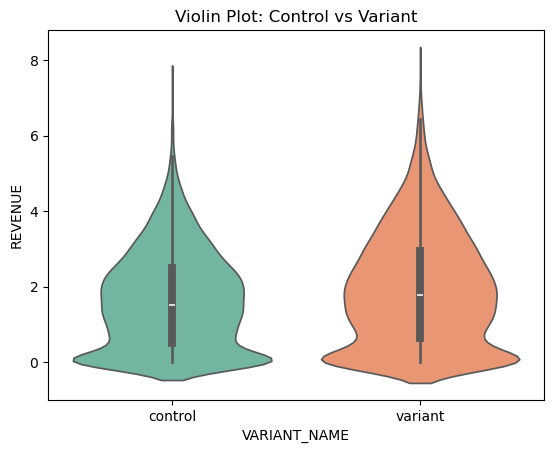

In [89]:
sns.violinplot(x='VARIANT_NAME', y='REVENUE', data=df, palette="Set2")
plt.title('Violin Plot: Control vs Variant')
plt.show()

<Axes: xlabel='REVENUE', ylabel='Density'>

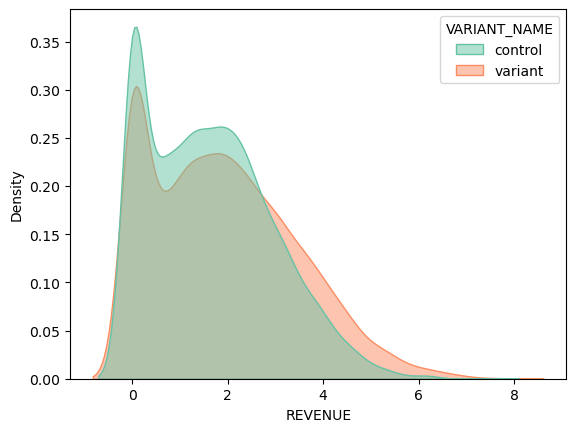

In [90]:
sns.kdeplot(data=df, x="REVENUE", hue="VARIANT_NAME", fill=True, common_norm=False, palette="Set2", alpha=0.5)

p < 0.05, reject the null for future membership!

In [91]:
# revenue related
# descriptive statistics
print("Mean: Control=", round(np.mean(control['REVENUE']),3), ", Variant=", round(np.mean(variant['REVENUE']),3))
print("Median: Control=", np.median(control['REVENUE']), ", Variant=", np.median(variant['REVENUE']))
print("Range: Control=", np.min(control['REVENUE']),"-", np.max(control['REVENUE']), ", Variant=", np.min(variant['REVENUE']),"-", np.max(variant['REVENUE']))
print("Standard deviation: Control=", round(np.std(control['REVENUE']),3), ", Variant=", round(np.std(variant['REVENUE']),3))

Mean: Control= 1.631 , Variant= 1.915
Median: Control= 1.52 , Variant= 1.77
Range: Control= 0.0 - 7.39 , Variant= 0.0 - 7.8
Standard deviation: Control= 1.295 , Variant= 1.505


In [92]:
# conduct independent sample t-test
t_statistic, p_value = stats.ttest_ind(control['REVENUE'], variant['REVENUE'], alternative='less')
print(f"T-statistic: {t_statistic:.3f}, P-value: {p_value:.3f}")

T-statistic: -10.126, P-value: 0.000


However, we want to check the assumptions of t-test are met first to choose proper statistical tests.

In [93]:
# check normality
_, p_a = stats.shapiro(control['REVENUE'])
_, p_b = stats.shapiro(variant['REVENUE'])
print(f"Normality p-values: Control={p_a:.3f}, Variant={p_b:.3f}")

Normality p-values: Control=0.000, Variant=0.000


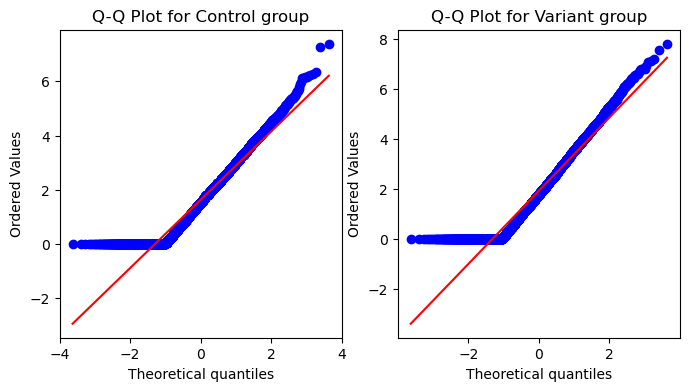

In [94]:
# qq plot
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,4))

stats.probplot(control['REVENUE'], plot=ax1)
ax1.set_title("Q-Q Plot for Control group")

stats.probplot(variant['REVENUE'], plot=ax2)
ax2.set_title("Q-Q Plot for Variant group")

plt.show()

Since both p-values of Shapiro test are smaller than 0.05 and the Q-Q plots look weird, both groups violate normality assumption. We use Mann-Whitney U test.

In [95]:
#try non-parametric version t-test: Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(control['REVENUE'], variant['REVENUE'], alternative='less')
print(f"U-statistic: {u_stat}, P-value: {p_value:.3f}")

U-statistic: 11307343.0, P-value: 0.000


p < 0.05, reject the null for revenue!